In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize, curve_fit
from scipy.optimize import curve_fit, minimize
from sklearn.metrics import mean_squared_error

In [3]:
df=pd.read_csv('Monthly_Master.csv')

In [4]:
df

,Unnamed: 0,Month_Year,gmv,units,sla,product_mrp,product_procurement_sla,order_date_only,is_holiday,Month,...,Radio,Other,NPS_Score,Stock_Index,List Price,Discount,Max Temp (°C),Min Temp (°C),is_sales,Holiday Week
0,0,2023-05,3149.000000,1.000000,6.000000,6990.000000,4.000000,2023-05-19 00:00:00.000000000,0.000000,5.0,...,1.10,4.987000,47.3,1228.0,3149.000000,54.949928,13.500000,11.0,0,0
1,1,2023-06,830.333333,1.000000,11.166667,1201.500000,2.333333,2023-06-23 00:00:00.000000000,0.000000,6.0,...,NaN,NaN,50.5,1194.0,830.333333,34.201479,27.255212,12.0,0,3
2,2,2023-07,1980.946588,1.025428,6.181534,3299.582581,4.344711,2023-07-18 09:53:18.362707712,0.000316,7.0,...,NaN,NaN,54.6,1177.0,2050.644094,NaN,33.500000,10.0,6761,3161
3,3,2023-08,1544.996310,1.014760,5.682657,2423.306273,2.678967,2023-08-25 20:32:46.051660544,0.022140,8.0,...,NaN,NaN,60.0,1206.0,1586.811808,36.501729,33.500000,15.0,20,26
4,4,2023-09,2029.912231,1.022973,5.745160,3281.805069,6.218172,2023-09-15 09:17:14.250150400,0.032944,9.0,...,NaN,NaN,46.9,1101.0,2105.269435,NaN,32.500000,9.0,0,47651
5,5,2023-10,2442.223547,1.022373,5.599346,4439.025272,3.749480,2023-10-16 13:36:10.183452928,0.032865,10.0,...,NaN,NaN,44.4,1210.0,2552.109523,NaN,24.500000,2.0,95456,52335
6,6,2023-11,2559.420651,1.024132,5.693794,4146.426281,4.558090,2023-11-13 22:31:34.684454400,0.039400,11.0,...,NaN,NaN,47.0,1233.0,2670.889635,NaN,23.000000,-4.0,44289,66302
7,7,2023-12,2755.722445,1.030793,5.575659,4630.957149,5.107593,2023-12-16 01:52:13.311834880,0.056370,12.0,...,NaN,NaN,45.8,1038.0,3018.841223,NaN,16.000000,-5.0,30713,30713
8,8,2024-01,2693.179760,1.021778,6.052473,4629.150847,4.974410,2024-01-15 23:36:45.152745984,0.031328,1.0,...,2.70,27.090000,47.1,1052.0,2836.856090,NaN,11.000000,-14.0,36791,34075
9,9,2024-02,2301.206585,1.020169,5.961516,3906.899198,4.885386,2024-02-15 10:35:08.969767680,0.091343,2.0,...,NaN,NaN,50.3,1222.0,2393.405899,NaN,17.500000,-18.0,28607,53639


In [5]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [6]:
df.isnull().sum()

Unnamed: 0                  0
Month_Year                  0
gmv                         0
units                       0
sla                         0
product_mrp                 0
product_procurement_sla     0
order_date_only             0
is_holiday                  0
Month                       0
Mean Temp (°C)              0
Heat Deg Days (°C)          0
Cool Deg Days (°C)          0
Total Rain (mm)             0
Total Snow (cm)             0
Total Precip (mm)           0
Snow on Grnd (cm)           0
Total Investment            0
TV                          0
Digital                     0
Sponsorship                 0
Content Marketing           0
Online marketing            0
 Affiliates                 0
SEM                         0
Radio                      11
Other                      11
NPS_Score                   0
Stock_Index                 0
List Price                  0
Discount                   11
Max Temp (°C)               0
Min Temp (°C)               0
is_sales  

In [7]:
df

,Unnamed: 0,Month_Year,gmv,units,sla,product_mrp,product_procurement_sla,order_date_only,is_holiday,Month,Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,Radio,Other,NPS_Score,Stock_Index,List Price,Discount,Max Temp (°C),Min Temp (°C),is_sales,Holiday Week
0,0,2023-05,3149.000000,1.000000,6.000000,6990.000000,4.000000,2023-05-19 00:00:00.000000000,0.000000,5.0,12.300000,5.700000,0.000000,0.000000,0.000000,0.000000,0.000000,78.057000,1.370000,0.770000,31.680000,0.790000,23.650000,6.800000,6.910000,1.10,4.987000,47.3,1228.0,3149.000000,54.949928,13.500000,11.0,0,0
1,1,2023-06,830.333333,1.000000,11.166667,1201.500000,2.333333,2023-06-23 00:00:00.000000000,0.000000,6.0,20.049345,0.022405,1.985465,15.100467,0.023688,15.303831,-0.035548,42.834216,1.662717,1.420761,25.048541,0.045081,7.971300,2.768023,3.735516,NaN,NaN,50.5,1194.0,830.333333,34.201479,27.255212,12.0,0,3
2,2,2023-07,1980.946588,1.025428,6.181534,3299.582581,4.344711,2023-07-18 09:53:18.362707712,0.000316,7.0,22.277292,0.080528,4.405762,2.241053,0.000616,2.211986,-0.034429,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,NaN,NaN,54.6,1177.0,2050.644094,NaN,33.500000,10.0,6761,3161
3,3,2023-08,1544.996310,1.014760,5.682657,2423.306273,2.678967,2023-08-25 20:32:46.051660544,0.022140,8.0,23.733328,-0.006034,5.710360,0.997706,0.029903,0.995309,0.013875,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,NaN,NaN,60.0,1206.0,1586.811808,36.501729,33.500000,15.0,20,26
4,4,2023-09,2029.912231,1.022973,5.745160,3281.805069,6.218172,2023-09-15 09:17:14.250150400,0.032944,9.0,20.740519,0.683450,3.393808,3.775905,-0.015755,3.726933,0.039410,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,NaN,NaN,46.9,1101.0,2105.269435,NaN,32.500000,9.0,0,47651
5,5,2023-10,2442.223547,1.022373,5.599346,4439.025272,3.749480,2023-10-16 13:36:10.183452928,0.032865,10.0,14.103790,4.083935,0.238509,0.602502,0.036696,0.578797,-0.011493,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,NaN,NaN,44.4,1210.0,2552.109523,NaN,24.500000,2.0,95456,52335
6,6,2023-11,2559.420651,1.024132,5.693794,4146.426281,4.558090,2023-11-13 22:31:34.684454400,0.039400,11.0,10.337022,7.640637,0.036135,3.190169,0.640402,3.789150,0.415639,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,NaN,NaN,47.0,1233.0,2670.889635,NaN,23.000000,-4.0,44289,66302
7,7,2023-12,2755.722445,1.030793,5.575659,4630.957149,5.107593,2023-12-16 01:52:13.311834880,0.056370,12.0,5.449232,12.569664,0.039200,2.826823,0.122661,2.966286,0.161747,106.745312,5.397502,3.063360,56.705419,1.067307,22.503756,6.826938,11.181030,NaN,NaN,45.8,1038.0,3018.841223,NaN,16.000000,-5.0,30713,30713
8,8,2024-01,2693.179760,1.021778,6.052473,4629.150847,4.974410,2024-01-15 23:36:45.152745984,0.031328,1.0,-0.155636,18.052296,-0.055529,3.863060,0.573532,4.345104,2.512091,74.196000,4.380000,0.456000,4.200000,0.900000,22.900000,7.370000,4.200000,2.70,27.090000,47.1,1052.0,2836.856090,NaN,11.000000,-14.0,36791,34075
9,9,2024-02,2301.206585,1.020169,5.961516,3906.899198,4.885386,2024-02-15 10:35:08.969767680,0.091343,2.0,0.510987,17.425577,0.059736,2.048844,0.937523,3.052218,1.001618,48.052000,2.586008,1.912651,11.725555,0.596771,19.892366,6.465019,4.873630,NaN,NaN,50.3,1222.0,2393.405899,NaN,17.500000,-18.0,28607,53639


In [8]:
df.columns

Index(['Unnamed: 0', 'Month_Year', 'gmv', 'units', 'sla', 'product_mrp',
       'product_procurement_sla', 'order_date_only', 'is_holiday', 'Month',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'Snow on Grnd (cm)', 'Total Investment', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', ' Affiliates', 'SEM', 'Radio',
       'Other', 'NPS_Score', 'Stock_Index', 'List Price', 'Discount',
       'Max Temp (°C)', 'Min Temp (°C)', 'is_sales', 'Holiday Week'],
      dtype='object')

Fitted Parameters per Channel:
TV: alpha = 3064.6746, mu = 0.010000, RMSE = 45.4793
Digital: alpha = 2942.3829, mu = 0.010000, RMSE = 148.3905
Sponsorship: alpha = 3332.6336, mu = 0.010000, RMSE = 448.8974
Content Marketing: alpha = 1943.9867, mu = 0.010000, RMSE = 9.2155
Online marketing: alpha = 3728.5289, mu = 0.010000, RMSE = 206.0394
Affiliates: alpha = 3555.7029, mu = 0.010000, RMSE = 66.8693
SEM: alpha = 2921.0942, mu = 0.010000, RMSE = 298.6680
Radio: alpha = 11349949.1251, mu = 0.000003, RMSE = 2.9170
Other: alpha = 33888138.0977, mu = 0.000001, RMSE = 36.2978

Overall RMSE of Non-linear Model: 1095.6852


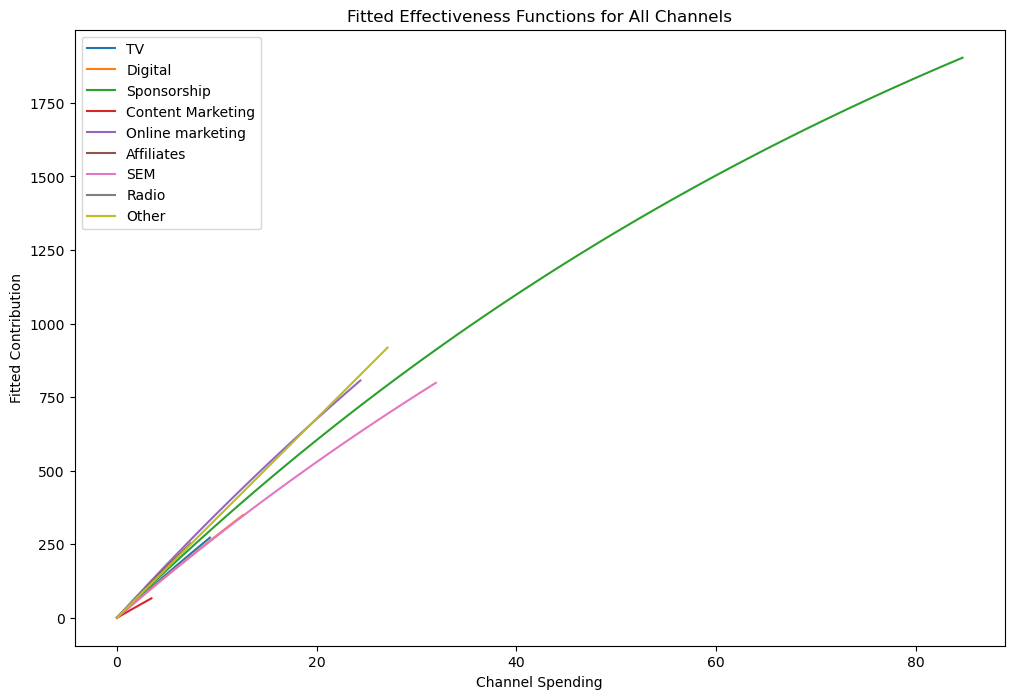


Historical Average Allocation Fractions:
TV: 4.84%
Digital: 3.49%
Sponsorship: 43.63%
Content Marketing: 0.90%
Online marketing: 23.02%
Affiliates: 7.26%
SEM: 10.86%
Radio: 0.62%
Other: 5.38%

Final Optimized Budget Allocation per Month (Non-linear Model):
Month_Year  Total Budget                                                                                                                                                         Optimal Allocation                                                                                                                                                    Optimal Fractions (%)
   2023-05     78.057000   {'TV': 3.02, 'Digital': 2.18, 'Sponsorship': 27.24, 'Content Marketing': 0.56, 'Online marketing': 14.37, 'Affiliates': 4.53, 'SEM': 6.78, 'Radio': 16.0, 'Other': 3.36}  {'TV': 3.87, 'Digital': 2.79, 'Sponsorship': 34.9, 'Content Marketing': 0.72, 'Online marketing': 18.41, 'Affiliates': 5.81, 'SEM': 8.68, 'Radio': 20.5, 'Other': 4.31}
   2023-06  

C:\Users\naiks\anaconda3\Lib\site-packages\scipy\optimize\_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
C:\Users\naiks\anaconda3\Lib\site-packages\scipy\optimize\_slsqp_py.py:441: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  g = append(wrapped_grad(x), 0.0)
C:\Users\naiks\anaconda3\Lib\site-packages\scipy\optimize\_slsqp_py.py:495: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  a_eq = vstack([con['jac'](x, *con['args'])


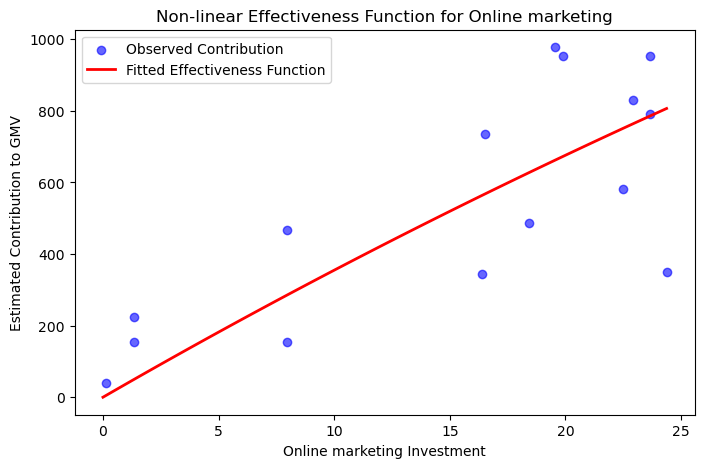

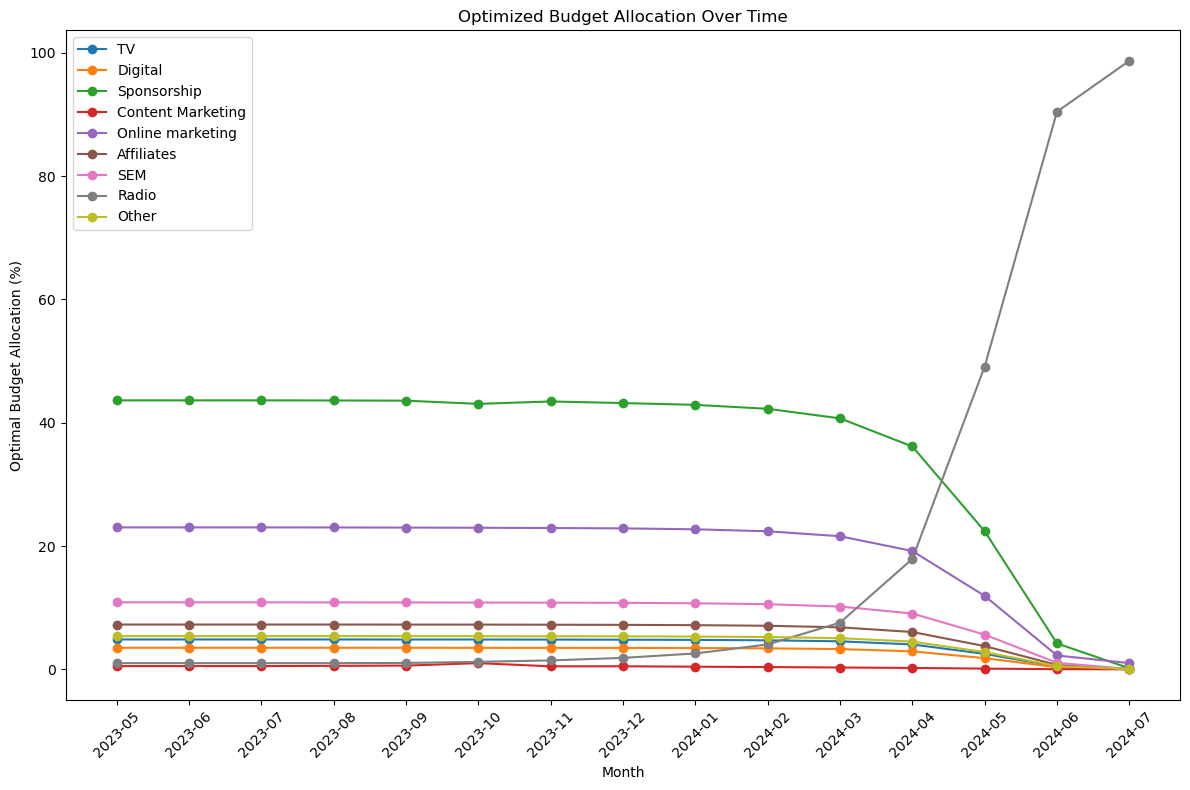

In [54]:


# =============================================================================
# 1. Load and Clean the Dataset
# =============================================================================
df = pd.read_csv("Monthly_Master.csv")
df.columns = df.columns.str.strip()   # Remove extra spaces from column names
df['Month_Year'] = df['Month_Year'].astype(str)

# =============================================================================
# 2. Define Channels and Impute Missing Values for "Radio" and "Other"
# =============================================================================
channels = ['TV', 'Digital', 'Sponsorship', 'Content Marketing',
            'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other']

# For each row, if "Radio" is missing, impute as:
#    Radio = Total Investment - (sum of investments in all channels except Radio and Other)
# If "Other" is missing, set it to 0.
for idx, row in df.iterrows():
    total_inv = row["Total Investment"]
    other_list = ['TV', 'Digital', 'Sponsorship', 'Content Marketing', 
                  'Online marketing', 'Affiliates', 'SEM']
    sum_others = row[other_list].sum()
    if pd.isna(row["Radio"]):
        other_val = row["Other"] if not pd.isna(row["Other"]) else 0
        df.at[idx, "Radio"] = total_inv - sum_others - other_val
    if pd.isna(row["Other"]):
        df.at[idx, "Other"] = 0

# =============================================================================
# 3. Fit a Non-linear Model for Each Channel Separately
# =============================================================================
# We assume an exponential saturation function:
#    f(x) = alpha * (1 - exp(-mu*x))
# Observed contribution for channel i: 
#    (channel spend / Total Investment) * GMV.
alpha_est = {}
mu_est = {}
rmse_dict = {}

def effectiveness_func(x, alpha, mu):
    return alpha * (1 - np.exp(-mu * x))

for ch in channels:
    xs = df[ch].values.astype(float)
    total_inv = df["Total Investment"].values.astype(float)
    gmvs = df["gmv"].values.astype(float)
    
    # Observed contribution
    contributions = (xs / np.where(total_inv == 0, np.nan, total_inv)) * gmvs
    
    # Filter valid values
    valid_idx = np.isfinite(contributions) & np.isfinite(xs)
    if np.sum(valid_idx) < 5:
        alpha_est[ch] = 1.0
        mu_est[ch] = 0.0005
        rmse_dict[ch] = np.nan
        continue
    x_valid = xs[valid_idx]
    y_valid = contributions[valid_idx]
    
    p0 = [np.max(y_valid), 0.0005]
    bounds = ([0, 1e-6], [np.inf, 1e-2])
    
    try:
        popt, _ = curve_fit(effectiveness_func, x_valid, y_valid, p0=p0, bounds=bounds, maxfev=10000)
        alpha_est[ch], mu_est[ch] = popt[0], popt[1]
        y_fit = effectiveness_func(x_valid, popt[0], popt[1])
        rmse = np.sqrt(mean_squared_error(y_valid, y_fit))
        rmse_dict[ch] = rmse
    except RuntimeError:
        alpha_est[ch] = np.max(y_valid)
        mu_est[ch] = 0.0005
        rmse_dict[ch] = np.nan

print("Fitted Parameters per Channel:")
for ch in channels:
    print(f"{ch}: alpha = {alpha_est[ch]:.4f}, mu = {mu_est[ch]:.6f}, RMSE = {rmse_dict[ch]:.4f}")

# =============================================================================
# 3a. Compute and Print Overall RMSE of the Non-linear Model
# =============================================================================
def predicted_GMV_row(row, channels, alpha_est, mu_est):
    total = 0
    for ch in channels:
        total += effectiveness_func(row[ch], alpha_est[ch], mu_est[ch])
    return total

predicted_GMVs = df.apply(lambda row: predicted_GMV_row(row, channels, alpha_est, mu_est), axis=1)
overall_rmse = np.sqrt(mean_squared_error(df["gmv"], predicted_GMVs))
print(f"\nOverall RMSE of Non-linear Model: {overall_rmse:.4f}")

# =============================================================================
# 4. (Optional) Plot Fitted Effectiveness Functions for All Channels
# =============================================================================
plt.figure(figsize=(12, 8))
for ch in channels:
    x_range = np.linspace(0, np.max(df[ch].values), 100)
    y_fit = effectiveness_func(x_range, alpha_est[ch], mu_est[ch])
    plt.plot(x_range, y_fit, label=f"{ch}")
plt.xlabel("Channel Spending")
plt.ylabel("Fitted Contribution")
plt.title("Fitted Effectiveness Functions for All Channels")
plt.legend()
plt.show()

# =============================================================================
# 5. Compute Historical Average Allocation Fractions from Data
# =============================================================================
hist_frac = {}
total_spend_all = df["Total Investment"].sum()
for ch in channels:
    hist_frac[ch] = df[ch].sum() / total_spend_all
print("\nHistorical Average Allocation Fractions:")
for ch in channels:
    print(f"{ch}: {hist_frac[ch]*100:.2f}%")

# =============================================================================
# 6. Define the Optimization Problem for Monthly Budget Allocation
# =============================================================================
# Predicted GMV for channel i: f_i(x_i) = alpha_i*(1 - exp(-mu_i*x_i))
def predicted_GMV(x, alpha, mu):
    contributions = np.array([alpha[i] * (1 - np.exp(-mu[i] * x[i])) for i in range(len(x))])
    return np.sum(contributions)

def neg_predicted_GMV(x, B, alpha, mu):
    return -predicted_GMV(x, alpha, mu)

def budget_constraint(x, B):
    return np.sum(x) - B

# For each channel, set a lower bound based on historical fraction.
# Lower bound = max(0.002 * B, 0.8 * (historical fraction) * B)
def lower_bound(B, ch):
    return max(0.002 * B, 0.8 * hist_frac[ch] * B)

# =============================================================================
# 7. Optimize Monthly Allocation With Channel-specific Lower Bounds
# =============================================================================
monthly_results = []
unique_months = sorted(df['Month_Year'].unique())

for month in unique_months:
    df_month = df[df['Month_Year'] == month]
    if df_month.empty:
        continue
    B = float(df_month["Total Investment"].iloc[0])
    x0 = np.full(len(channels), B / len(channels))
    cons = [{'type': 'eq', 'fun': lambda x, B=B: budget_constraint(x, B)}]
    bnds = [(lower_bound(B, ch), B) for ch in channels]
    
    opt_result = minimize(neg_predicted_GMV, x0, args=(B, np.array([alpha_est[ch] for ch in channels]),
                                                         np.array([mu_est[ch] for ch in channels])),
                          method='SLSQP', bounds=bnds, constraints=cons)
    if opt_result.success:
        optimal_alloc = opt_result.x
        fractions = optimal_alloc / B * 100
        monthly_results.append({
            'Month_Year': month,
            'Total Budget': B,
            'Optimal Allocation': dict(zip(channels, np.round(optimal_alloc, 2))),
            'Optimal Fractions (%)': dict(zip(channels, np.round(fractions, 2)))
        })
    else:
        print(f"Optimization failed for month: {month}")

monthly_df = pd.DataFrame(monthly_results)
print("\nFinal Optimized Budget Allocation per Month (Non-linear Model):")
print(monthly_df.to_string(index=False))

# =============================================================================
# 8. Plot the Fitted Effectiveness Function for "Online marketing"
# =============================================================================
channel_to_plot = "Online marketing"
x_vals = np.linspace(0, np.max(df[channel_to_plot].values), 100)
fitted_vals = alpha_est[channel_to_plot] * (1 - np.exp(-mu_est[channel_to_plot] * x_vals))

plt.figure(figsize=(8, 5))
plt.scatter(df[channel_to_plot].values, 
            (df[channel_to_plot] / df["Total Investment"].values * df["gmv"].values),
            label="Observed Contribution", color="blue", alpha=0.6)
plt.plot(x_vals, fitted_vals, label="Fitted Effectiveness Function", color="red", linewidth=2)
plt.xlabel(f"{channel_to_plot} Investment")
plt.ylabel("Estimated Contribution to GMV")
plt.title(f"Non-linear Effectiveness Function for {channel_to_plot}")
plt.legend()
plt.show()


##
plt.figure(figsize=(12, 8))
for ch in channels:
    plt.plot(res['Month_Year'], res['Optimal Fractions (%)'].apply(lambda x: x[ch]), marker='o', label=ch)
plt.xlabel("Month")
plt.ylabel("Optimal Budget Allocation (%)")
plt.title("Optimized Budget Allocation Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Fitted Parameters per Channel:
TV: alpha = 3064.6746, mu = 0.010000, RMSE = 45.4793
Digital: alpha = 2942.3829, mu = 0.010000, RMSE = 148.3905
Sponsorship: alpha = 3332.6336, mu = 0.010000, RMSE = 448.8974
Content Marketing: alpha = 1943.9867, mu = 0.010000, RMSE = 9.2155
Online marketing: alpha = 3728.5289, mu = 0.010000, RMSE = 206.0394
Affiliates: alpha = 3555.7029, mu = 0.010000, RMSE = 66.8693
SEM: alpha = 2921.0942, mu = 0.010000, RMSE = 298.6680
Radio: alpha = 11349949.1251, mu = 0.000003, RMSE = 2.9170
Other: alpha = 33888138.0977, mu = 0.000001, RMSE = 36.2978

Historical Average Allocation Fractions:
TV: 4.84%
Digital: 3.49%
Sponsorship: 43.63%
Content Marketing: 0.90%
Online marketing: 23.02%
Affiliates: 7.26%
SEM: 10.86%
Radio: 0.62%
Other: 5.38%

Final Optimized Budget Allocation per Month (Adaptive Time-Series Model):
Month_Year  Total Budget                                                                                                                                    

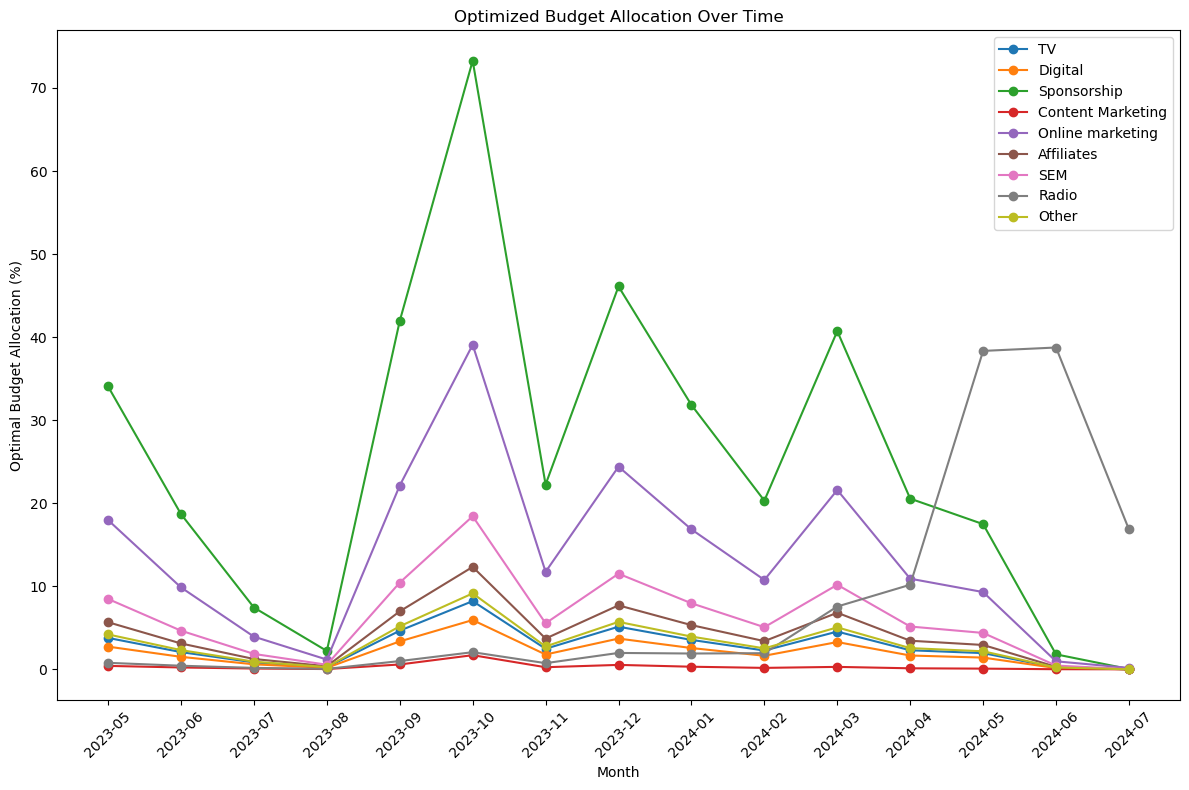

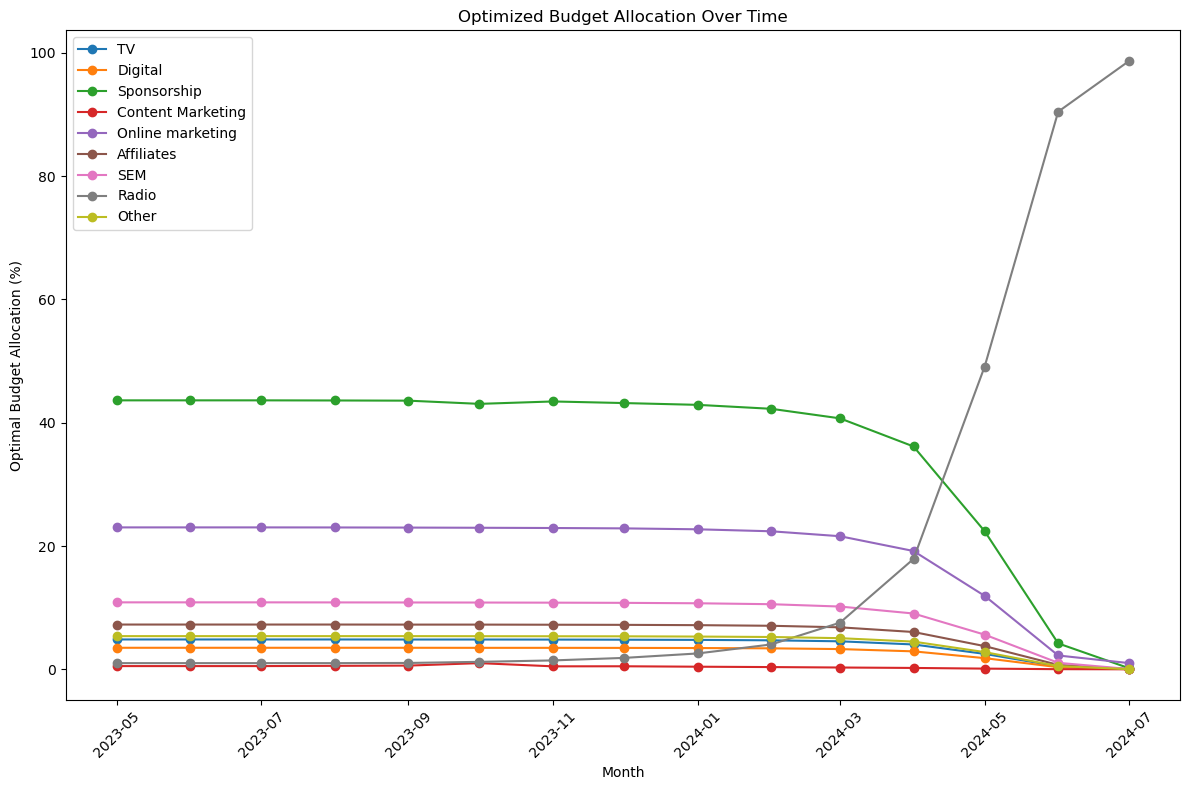


Model Ready for Future Data Integration.


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, curve_fit
from sklearn.metrics import mean_squared_error

# =============================================================================
# 1. Load and Preprocess Data
# =============================================================================
df2 = pd.read_csv("Monthly_Master.csv")
df2.columns = df2.columns.str.strip()
df2['Month_Year'] = df2['Month_Year'].astype(str)

# Define marketing channels used for budget allocation
channels = ['TV', 'Digital', 'Sponsorship', 'Content Marketing',
            'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other']

# Impute missing values for "Radio" and "Other"
for idx, row in df2.iterrows():
    total_inv = row["Total Investment"]
    sum_channels = row[channels].sum()
    if pd.isna(row["Radio"]):
        df2.at[idx, "Radio"] = max(0, total_inv - sum_channels)
    if pd.isna(row["Other"]):
        df2.at[idx, "Other"] = 0

# =============================================================================
# 2. Fit Effectiveness Model (Non-Linear) for Each Channel
# =============================================================================
def effectiveness_func(x, alpha, mu):
    return alpha * (1 - np.exp(-mu * x))

alpha_est, mu_est, rmse_dict = {}, {}, {}

for ch in channels:
    xs = df2[ch].values.astype(float)
    total_inv = df2["Total Investment"].values.astype(float)
    gmvs = df2["gmv"].values.astype(float)
    # Observed contribution = (channel spend / Total Investment) * GMV
    contributions = (xs / np.where(total_inv == 0, np.nan, total_inv)) * gmvs
    valid_idx = np.isfinite(contributions) & np.isfinite(xs)
    if np.sum(valid_idx) < 5:
        alpha_est[ch], mu_est[ch] = 1.0, 0.0005
        continue
    x_valid, y_valid = xs[valid_idx], contributions[valid_idx]
    p0 = [np.max(y_valid), 0.0005]
    bounds = ([0, 1e-6], [np.inf, 1e-2])
    popt, _ = curve_fit(effectiveness_func, x_valid, y_valid, p0=p0, bounds=bounds, maxfev=10000)
    alpha_est[ch], mu_est[ch] = popt[0], popt[1]
    y_fit = effectiveness_func(x_valid, popt[0], popt[1])
    rmse_dict[ch] = np.sqrt(mean_squared_error(y_valid, y_fit))

print("Fitted Parameters per Channel:")
for ch in channels:
    print(f"{ch}: alpha = {alpha_est[ch]:.4f}, mu = {mu_est[ch]:.6f}, RMSE = {rmse_dict[ch]:.4f}")

# =============================================================================
# 3. Compute Historical Average Allocation Fractions
# =============================================================================
hist_frac = {}
total_spend_all = df2["Total Investment"].sum()
for ch in channels:
    hist_frac[ch] = df2[ch].sum() / total_spend_all

print("\nHistorical Average Allocation Fractions:")
for ch in channels:
    print(f"{ch}: {hist_frac[ch]*100:.2f}%")

# =============================================================================
# 4. Dynamic Weight Update (Channel-Specific)
# =============================================================================
# Initialize weights using historical fractions as baseline
weights = {ch: hist_frac[ch] for ch in channels}
learning_rate = 0.3  # Aggressiveness of weight update

unique_months = sorted(df2['Month_Year'].unique())
monthly_results = []
prev_opt_fraction = None  # To store previous month's optimal fractions

# =============================================================================
# 5. Define Optimization Problem for Budget Allocation
# =============================================================================
def predicted_GMV(x, alpha, mu):
    return np.sum([alpha[i] * (1 - np.exp(-mu[i] * x[i])) for i in range(len(x))])

def neg_predicted_GMV(x, B, alpha, mu):
    return -predicted_GMV(x, alpha, mu)

def budget_constraint(x, B):
    return np.sum(x) - B

# =============================================================================
# 6. Optimize Budget Allocation for Each Month with Adaptive Weights
# =============================================================================
for i, month in enumerate(unique_months):
    df_month = df2[df2['Month_Year'] == month]
    if df_month.empty:
        continue
    B = float(df_month["Total Investment"].iloc[0])
    
    # Define bounds: Lower bound = max(0.002*B, 0.5 * hist_frac[ch] * B); Upper bound = max(0.01*B, B * current weight)
    bnds = [(min(max(0.002 * B, 0.5 * hist_frac[ch] * B), B * weights[ch]), max(0.01 * B, B * weights[ch])) for ch in channels]
    
    # Initial guess: allocate proportionally to current weights (normalized to sum B)
    x0 = np.array([B * weights[ch] for ch in channels])
    x0 = x0 / np.sum(x0) * B
    cons = [{'type': 'eq', 'fun': lambda x, B=B: budget_constraint(x, B)}]
    
    opt_result = minimize(neg_predicted_GMV, x0,
                          args=(B, np.array([alpha_est[ch] for ch in channels]),
                                np.array([mu_est[ch] for ch in channels])),
                          method='SLSQP', bounds=bnds, constraints=cons)
    
    if opt_result.success:
        optimal_alloc = opt_result.x
        fractions = optimal_alloc / B
        current_opt_fraction = {ch: optimal_alloc[i] / B for i, ch in enumerate(channels)}
        monthly_results.append({
            'Month_Year': month,
            'Total Budget': B,
            'Optimal Allocation': dict(zip(channels, np.round(optimal_alloc, 2))),
            'Optimal Fractions (%)': dict(zip(channels, np.round(fractions * 100, 2)))
        })
        # Update weights for each channel using the ratio of previous month's optimal fraction to historical fraction
        if prev_opt_fraction is not None:
            for ch in channels:
                ratio = prev_opt_fraction[ch] / hist_frac[ch] if hist_frac[ch] > 0 else 1
                weights[ch] = (1 - learning_rate) * weights[ch] + learning_rate * (weights[ch] * ratio)
        prev_opt_fraction = current_opt_fraction
        # Normalize weights
        total_w = sum(weights.values())
        for ch in channels:
            weights[ch] = weights[ch] / total_w
    else:
        print(f"Optimization failed for month: {month}")

# Store final results in DataFrame 'res'
res = pd.DataFrame(monthly_results)
print("\nFinal Optimized Budget Allocation per Month (Adaptive Time-Series Model):")
print(res.to_string(index=False))

# =============================================================================
# 7. Plot Optimized Budget Allocation Over Time
# =============================================================================
plt.figure(figsize=(12, 8))
for ch in channels:
    plt.plot(res['Month_Year'], res['Optimal Allocation'].apply(lambda x: x[ch]), marker='o', label=ch)
plt.xlabel("Month")
plt.ylabel("Optimal Budget Allocation (%)")
plt.title("Optimized Budget Allocation Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# =============================================================================
# 7. Plot Optimized Budget Allocation Over Time (Corrected Plot)
# =============================================================================
# Convert Month_Year to a datetime object for proper ordering on the x-axis
res['Month_Year_dt'] = pd.to_datetime(res['Month_Year'], format='%Y-%m')

plt.figure(figsize=(12, 8))
for ch in channels:
    # Plot each channel's fraction versus the datetime values
    plt.plot(res['Month_Year_dt'], res['Optimal Fractions (%)'].apply(lambda x: x[ch]),
             marker='o', label=ch)
plt.xlabel("Month")
plt.ylabel("Optimal Budget Allocation (%)")
plt.title("Optimized Budget Allocation Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# =============================================================================
# 8. Model Adaptation for Future Data Integration
# =============================================================================
def update_model(new_data, res, alpha_est, mu_est):
    res = pd.concat([res, new_data]).reset_index(drop=True)
    for ch in channels:
        xs = res[ch].values.astype(float)
        gmvs = res["gmv"].values.astype(float)
        valid_idx = np.isfinite(xs) & np.isfinite(gmvs)
        if np.sum(valid_idx) > 5:
            x_valid, y_valid = xs[valid_idx], gmvs[valid_idx]
            popt, _ = curve_fit(effectiveness_func, x_valid, y_valid, 
                                p0=[np.max(y_valid), 0.0005], 
                                bounds=([0, 1e-6], [np.inf, 1e-2]))
            alpha_est[ch], mu_est[ch] = popt[0], popt[1]
    return res, alpha_est, mu_est

print("\nModel Ready for Future Data Integration.")


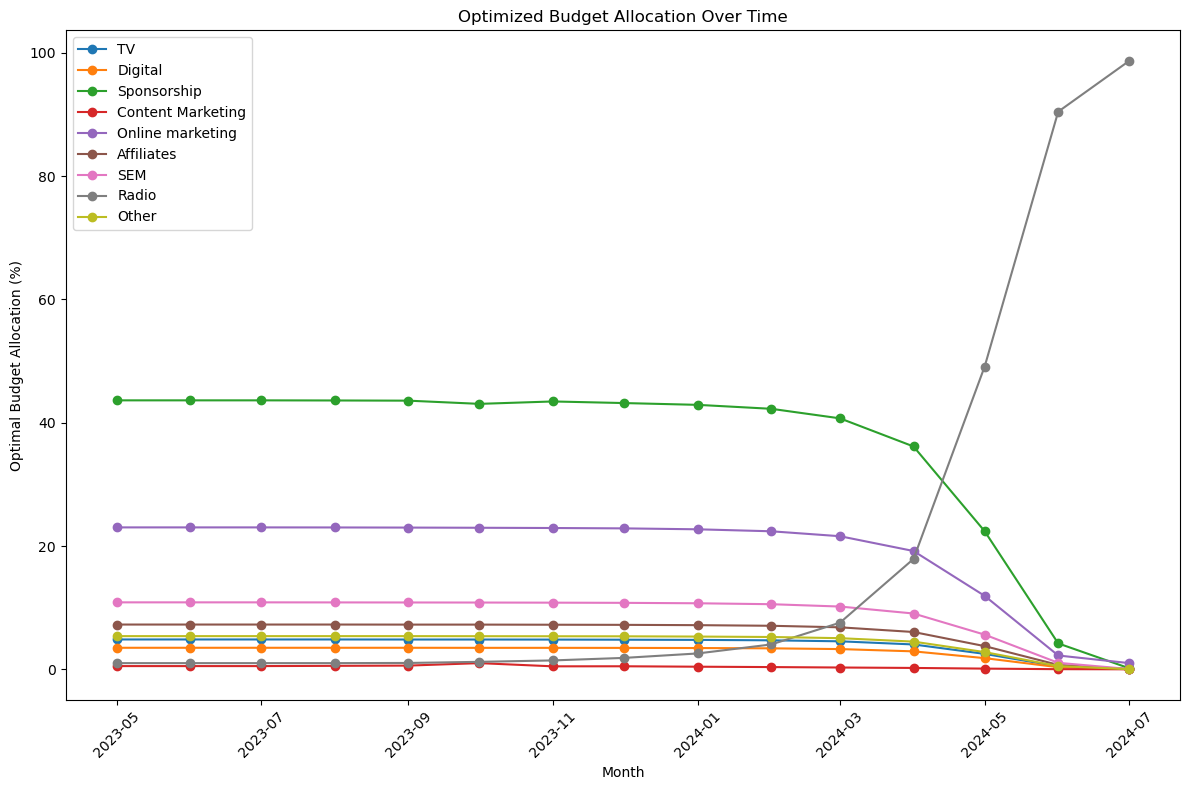

In [44]:
# =============================================================================
# 7. Plot Optimized Budget Allocation Over Time (Corrected Plot)
# =============================================================================
# Convert Month_Year to a datetime object for proper ordering on the x-axis
res['Month_Year_dt'] = pd.to_datetime(res['Month_Year'], format='%Y-%m')

plt.figure(figsize=(12, 8))
for ch in channels:
    # Plot each channel's fraction versus the datetime values
    plt.plot(res['Month_Year_dt'], res['Optimal Fractions (%)'].apply(lambda x: x[ch]),
             marker='o', label=ch)
plt.xlabel("Month")
plt.ylabel("Optimal Budget Allocation (%)")
plt.title("Optimized Budget Allocation Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Fitted Hill Parameters per Channel (alpha, beta, n):
TV: (5434611.456942924, 815455.1469702899, 0.8889935190880102)
Digital: (200.17139080941726, 1.7209075504203872, 4.999999999999999)
Sponsorship: (2639.9396563640253, 90.99661279615566, 0.5529597629524008)
Content Marketing: (58.84048010474586, 1.3385636812466561, 1.523482125818777)
Online marketing: (11919010.56194217, 1427487.7962225038, 0.8972977203461333)
Affiliates: (12199744.406945765, 966287.0307235725, 0.9369583740556623)
SEM: (363.6123142788796, 2.1256433444646347e-09, 0.10000000000000002)
Radio: (99.98002512331217, 1.2267041130368632, 4.972335308275057)
Other: (1234.3017074390425, 18.99491472526299, 3.8544446071137726)

Historical Average Allocation Fractions:
TV: 4.84%
Digital: 3.49%
Sponsorship: 43.63%
Content Marketing: 0.90%
Online marketing: 23.02%
Affiliates: 7.26%
SEM: 10.86%
Radio: 0.62%
Other: 5.38%

Final Optimized Budget Allocation per Month (Adaptive Time-Series Model with Adstock + Hill):
Month_Year  Total Budg

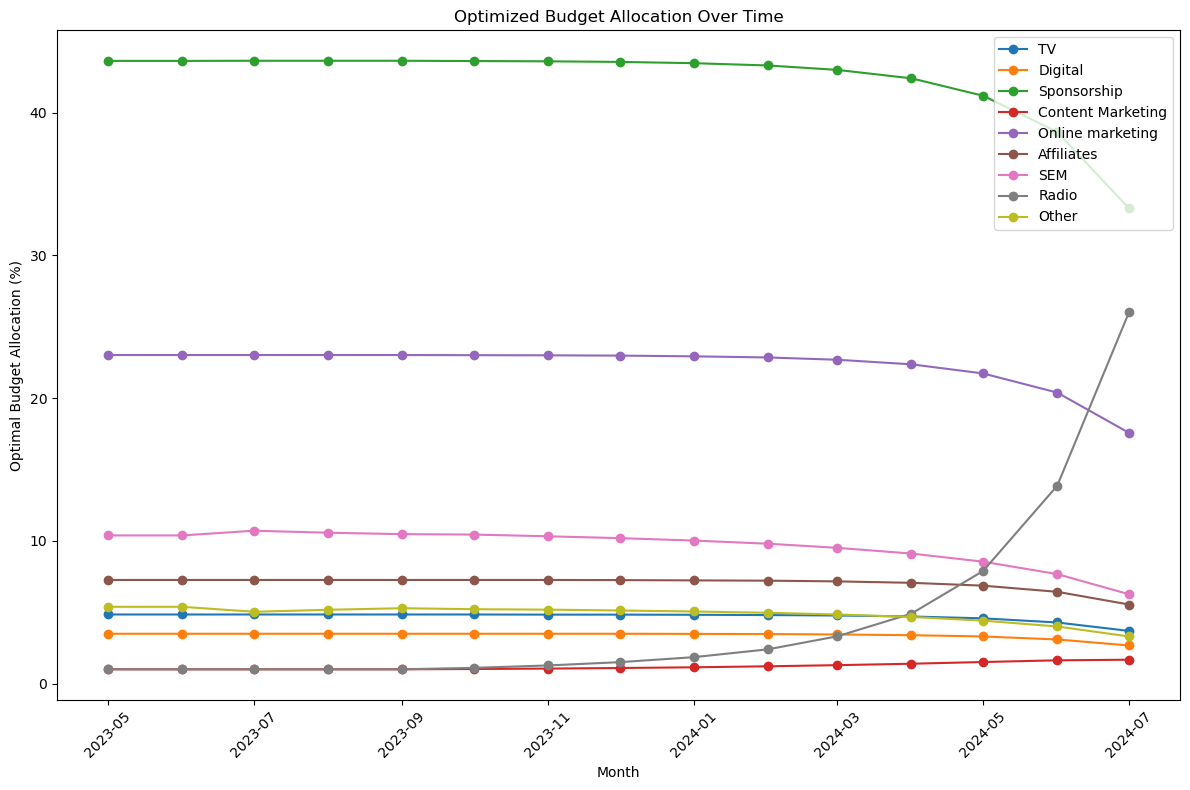


Model Ready for Future Data Integration.


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, curve_fit
from sklearn.metrics import mean_squared_error

# =============================================================================
# 1. Load and Preprocess Data
# =============================================================================
df2 = pd.read_csv("Monthly_Master.csv")
df2.columns = df2.columns.str.strip()
df2['Month_Year'] = df2['Month_Year'].astype(str)

# Define channels used for budget allocation
channels = ['TV', 'Digital', 'Sponsorship', 'Content Marketing',
            'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other']

# Impute missing values for "Radio" and "Other"
for idx, row in df2.iterrows():
    total_inv = row["Total Investment"]
    sum_channels = row[channels].sum()
    if pd.isna(row["Radio"]):
        df2.at[idx, "Radio"] = max(0, total_inv - sum_channels)
    if pd.isna(row["Other"]):
        df2.at[idx, "Other"] = 0

# =============================================================================
# 2. Fit Hill Function Parameters for Each Channel Using Effective Spend
# =============================================================================
# We first compute effective spend using adstock: effective = current + lam * previous.
lam = 0.3  # fixed adstock parameter

# Assume df2 contains one record per month, sorted by Month_Year
df2 = df2.sort_values('Month_Year').reset_index(drop=True)

hill_params = {}  # Will store (alpha, beta, n) per channel.
# We'll only fit from the second month onward
for ch in channels:
    eff_spend = []
    contrib = []
    # Loop over months from the second record onward
    for i in range(1, len(df2)):
        x_prev = df2.loc[i-1, ch]
        x_curr = df2.loc[i, ch]
        effective = x_curr + lam * x_prev
        eff_spend.append(effective)
        tot_inv = df2.loc[i, "Total Investment"]
        gmv = df2.loc[i, "gmv"]
        c = (x_curr / tot_inv) * gmv if tot_inv != 0 else 0
        contrib.append(c)
    eff_spend = np.array(eff_spend)
    contrib = np.array(contrib)
    if len(eff_spend) < 5:
        hill_params[ch] = (1.0, 1.0, 1.0)
        continue
    try:
        p0 = [np.max(contrib), np.median(eff_spend), 1.0]
        bounds = ([0, 0, 0.1], [np.inf, np.inf, 5])
        popt, _ = curve_fit(lambda x, alpha, beta, n: (alpha * (x**n)) / (beta**n + x**n),
                            eff_spend, contrib, p0=p0, bounds=bounds, maxfev=10000)
        hill_params[ch] = (popt[0], popt[1], popt[2])
    except RuntimeError:
        hill_params[ch] = (1.0, 1.0, 1.0)

print("\nFitted Hill Parameters per Channel (alpha, beta, n):")
for ch in channels:
    print(f"{ch}: {hill_params[ch]}")

# =============================================================================
# 3a. Compute Historical Average Allocation Fractions
# =============================================================================
hist_frac = {}
total_spend_all = df2["Total Investment"].sum()
for ch in channels:
    hist_frac[ch] = df2[ch].sum() / total_spend_all

print("\nHistorical Average Allocation Fractions:")
for ch in channels:
    print(f"{ch}: {hist_frac[ch]*100:.2f}%")

# =============================================================================
# 4. Define Optimization Problem with Adstock + Hill Transformation
# =============================================================================
def predicted_GMV_combined(x, alpha_arr, beta_arr, n_arr, x_prev_arr, lam=0.3):
    # For each channel, effective spend = x[i] + lam * x_prev_arr[i], then apply Hill function
    effects = [ (alpha_arr[i] * ((x[i] + lam * x_prev_arr[i]) ** n_arr[i])) / 
                (beta_arr[i] ** n_arr[i] + (x[i] + lam * x_prev_arr[i]) ** n_arr[i])
                for i in range(len(x)) ]
    return np.sum(effects)

def neg_predicted_GMV_combined(x, B, alpha_arr, beta_arr, n_arr, x_prev_arr, lam=0.3):
    return -predicted_GMV_combined(x, alpha_arr, beta_arr, n_arr, x_prev_arr, lam)

def budget_constraint(x, B):
    return np.sum(x) - B

# =============================================================================
# 5. Optimize Budget Allocation for Each Month with Adaptive Weights
# =============================================================================
# Initialize weights with historical fractions as baseline
weights = {ch: hist_frac[ch] for ch in channels}
learning_rate = 0.3

unique_months = sorted(df2['Month_Year'].unique())
monthly_results = []
prev_opt_fraction = None  # To store previous month's optimal fraction per channel
prev_allocations = {ch: 0 for ch in channels}  # For adstock lag: first month lag=0

for i, month in enumerate(unique_months):
    df_month = df2[df2['Month_Year'] == month]
    if df_month.empty:
        continue
    B = float(df_month["Total Investment"].iloc[0])
    # x_prev: previous month's allocation (for adstock). For the first month, use 0.
    x_prev_arr = np.array([prev_allocations[ch] for ch in channels])
    
    # Set bounds: Lower bound = max(0.002*B, 0.5 * hist_frac[ch] * B); Upper bound = max(0.01*B, B * current weight)
    bnds = [(max(0.002 * B, 0.5 * hist_frac[ch] * B), max(0.01 * B, B * weights[ch])) for ch in channels]
    
    # Initial guess: allocate proportionally to current weights (normalized to sum B)
    x0 = np.array([B * weights[ch] for ch in channels])
    x0 = x0 / np.sum(x0) * B
    cons = [{'type': 'eq', 'fun': lambda x, B=B: budget_constraint(x, B)}]
    
    # Prepare Hill parameters arrays for each channel
    alpha_arr = np.array([hill_params[ch][0] for ch in channels])
    beta_arr  = np.array([hill_params[ch][1] for ch in channels])
    n_arr     = np.array([hill_params[ch][2] for ch in channels])
    
    opt_result = minimize(neg_predicted_GMV_combined, x0,
                          args=(B, alpha_arr, beta_arr, n_arr, x_prev_arr, lam),
                          method='SLSQP', bounds=bnds, constraints=cons)
    
    if opt_result.success:
        optimal_alloc = opt_result.x
        fractions = optimal_alloc / B
        current_opt_fraction = {ch: optimal_alloc[j] / B for j, ch in enumerate(channels)}
        monthly_results.append({
            'Month_Year': month,
            'Total Budget': B,
            'Optimal Allocation': dict(zip(channels, np.round(optimal_alloc, 2))),
            'Optimal Fractions (%)': dict(zip(channels, np.round(fractions * 100, 2)))
        })
        # Update weights: use channel-specific update based on the ratio of previous optimal fraction to historical fraction
        if prev_opt_fraction is not None:
            for ch in channels:
                # More aggressive update: new_weight = old_weight * ( (prev_opt_fraction[ch] / hist_frac[ch])^learning_rate )
                ratio = prev_opt_fraction[ch] / hist_frac[ch] if hist_frac[ch] > 0 else 1
                weights[ch] = weights[ch] * (ratio ** learning_rate)
        prev_opt_fraction = current_opt_fraction
        # Update adstock lag for next month: store current allocation amounts
        for ch in channels:
            prev_allocations[ch] = current_opt_fraction[ch] * B
        # Normalize weights
        total_w = sum(weights.values())
        for ch in channels:
            weights[ch] = weights[ch] / total_w
    else:
        print(f"Optimization failed for month: {month}")

# Store final results in DataFrame 'res'
res = pd.DataFrame(monthly_results)
print("\nFinal Optimized Budget Allocation per Month (Adaptive Time-Series Model with Adstock + Hill):")
print(res.to_string(index=False))

# =============================================================================
# 6a. Plot Optimized Budget Allocation Over Time (Fractions)
# =============================================================================
# Convert Month_Year to datetime for proper ordering on x-axis
res['Month_Year_dt'] = pd.to_datetime(res['Month_Year'], format='%Y-%m')

plt.figure(figsize=(12, 8))
for ch in channels:
    plt.plot(res['Month_Year_dt'], res['Optimal Fractions (%)'].apply(lambda x: x[ch]),
             marker='o', label=ch)
plt.xlabel("Month")
plt.ylabel("Optimal Budget Allocation (%)")
plt.title("Optimized Budget Allocation Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# =============================================================================
# 7. Model Adaptation for Future Data Integration
# =============================================================================
def update_model(new_data, res, alpha_est, mu_est, hill_params):
    res = pd.concat([res, new_data]).reset_index(drop=True)
    for ch in channels:
        xs = res[ch].values.astype(float)
        gmvs = res["gmv"].values.astype(float)
        valid_idx = np.isfinite(xs) & np.isfinite(gmvs)
        if np.sum(valid_idx) > 5:
            x_valid, y_valid = xs[valid_idx], gmvs[valid_idx]
            popt, _ = curve_fit(effectiveness_func, x_valid, y_valid, p0=[np.max(y_valid), 0.0005], 
                                bounds=([0, 1e-6], [np.inf, 1e-2])) 
            alpha_est[ch], mu_est[ch] = popt[0], popt[1]
    return res, alpha_est, mu_est

print("\nModel Ready for Future Data Integration.")


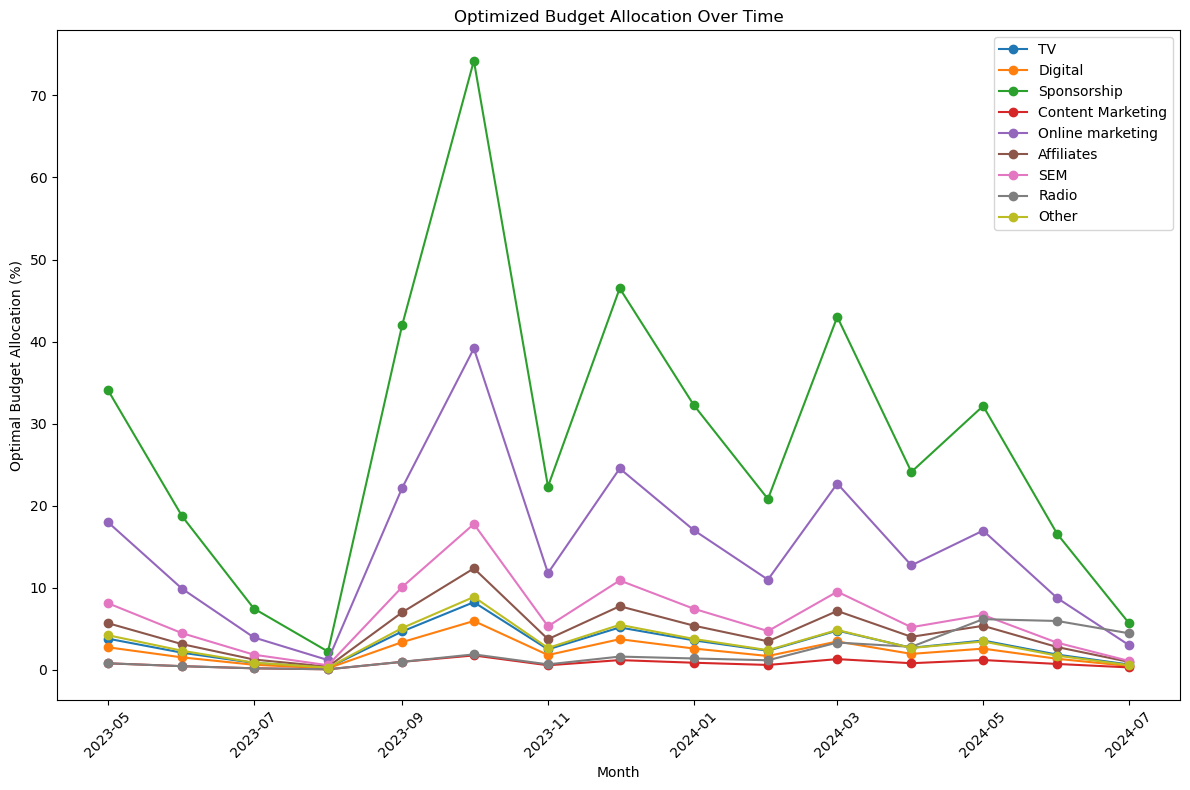

In [79]:
plt.figure(figsize=(12, 8))
for ch in channels:
    plt.plot(res['Month_Year_dt'], res['Optimal Allocation'].apply(lambda x: x[ch]),
             marker='o', label=ch)
plt.xlabel("Month")
plt.ylabel("Optimal Budget Allocation (%)")
plt.title("Optimized Budget Allocation Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()